In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.reset_defaults()
from scipy import special

# plt.plot(range(2,11),[sum(special.binom(k,1+j) for j in range(k)) for k in range(2,11)])

## make_classification

In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from secoc import estimator; reload(estimator)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.datasets import make_classification, make_blobs
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(centers=4, n_samples=1000, n_features=100, cluster_std=30)

In [3]:
train_index, test_index = next(StratifiedShuffleSplit(n_splits=1, test_size=.2).split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
# X_train_small = X_train
# y_train_small = y_tr

In [133]:
reload(estimator)
from sklearn.tree import DecisionTreeClassifier
est = estimator.SlidingECOC(
    LogisticRegressionCV(), n_estimators_window=10, window_size=25,
    oob_score=True, code_size=2000, single_seed_features=True, single_seed_samples=True,
    circular_features=True, n_estimators=None, stride=1, n_jobs=-1)

est_proba = estimator.SlidingECOCProba(
    LogisticRegressionCV(), n_estimators_window=10, window_size=25,
    oob_score=True, code_size=2000, single_seed_features=True, single_seed_samples=True,
    circular_features=True, n_estimators=None, stride=1, n_jobs=-1)

In [134]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# pipe = make_pipeline(est, LogisticRegression())
pipe = make_pipeline(est, LogisticRegression())
pipe2 = make_pipeline(est_proba, LogisticRegression())

In [135]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('slidingecoc', SlidingECOC(base_estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solv...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [136]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('slidingecocproba', SlidingECOCProba(base_estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [137]:
print pipe.score(X_test, y_test)
print pipe2.score(X_test, y_test)

0.57
0.7


In [127]:
est.fit(X_train, y_train)

SlidingECOC(base_estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0),
      bootstrap=True, bootstrap_features=False, circular_features=True,
      code_size=2000, max_features=1.0, max_samples=1.0, n_estimators=1000,
      n_estimators_window=10, n_jobs=-1, oob_score=True, random_state=None,
      single_seed_features=True, single_seed_samples=True, stride=1,
      verbose=0, window_size=25)

In [128]:
encoding = est.transform(X_train)

In [129]:
encoding

array([[0, 1, 1, ..., 2, 1, 1],
       [0, 3, 0, ..., 2, 1, 3],
       [1, 2, 1, ..., 1, 1, 1],
       ..., 
       [1, 1, 1, ..., 1, 2, 2],
       [3, 1, 1, ..., 1, 2, 1],
       [2, 2, 2, ..., 1, 1, 1]])

In [69]:
est.transform_proba(X_train)

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.7s finished


array([[ 0.82392005,  0.17607995,  0.88949566, ...,  0.44782913,
         0.47257401,  0.52742599],
       [ 0.8899064 ,  0.1100936 ,  0.89022514, ...,  0.59951593,
         0.44685499,  0.55314501],
       [ 0.89561258,  0.10438742,  0.73779516, ...,  0.53770828,
         0.49675766,  0.50324234],
       ..., 
       [ 0.59068611,  0.40931389,  0.36121273, ...,  0.42941776,
         0.53627256,  0.46372744],
       [ 0.98945903,  0.01054097,  0.84322867, ...,  0.55548722,
         0.5340115 ,  0.4659885 ],
       [ 0.93169831,  0.06830169,  0.77130298, ...,  0.41136512,
         0.52417642,  0.47582358]])

In [34]:
est.score(X_test, y_test)

/home/fede/miniconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function predict is deprecated; It will be removed in release 0.1. Use SlidingECOC in a sklearn Pipeline instead.
  warnings.warn(msg, category=DeprecationWarning)
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.7s finished


0.68500000000000005

In [153]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(metric='hamming', algorithm='brute', n_jobs=-1, n_neighbors=5)
code_range = map(int, np.linspace(10,1000, 100))
tr_score, ts_score = [], []
for code_size in code_range:
    y_pred = est.predict(X_test, classifier=clf, code_size=code_size)
    ts_score.append(accuracy_score(y_test, y_pred))
    y_pred = est.predict(X_train, classifier=clf, code_size=code_size)
    tr_score.append(accuracy_score(y_train, y_pred))

In [154]:
X_small_train = X_train[est.estimators_samples_[0]]
y_small_train = y_train[est.estimators_samples_[0]]
lr = LogisticRegression().fit(X_small_train, y_small_train)
base_train_score_logistic = lr.score(X_train, y_train)
base_test_score_logistic = lr.score(X_test, y_test)

In [155]:
from sklearn.ensemble import BaggingClassifier
X_small_train = X_train[est.estimators_samples_[0]]
y_small_train = y_train[est.estimators_samples_[0]]
bc = BaggingClassifier(LogisticRegression(), n_estimators=2000, max_samples=.5, max_features=1.0,
                  bootstrap=False, bootstrap_features=False, oob_score=0, warm_start=False, n_jobs=-1)
bc.fit(X_small_train, y_small_train)
base_train_score = bc.score(X_train, y_train)
base_test_score = bc.score(X_test, y_test)

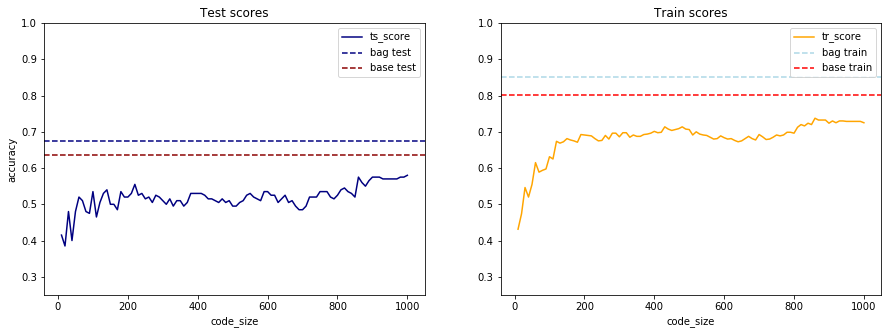

In [156]:
plt.figure(figsize=(15,20));
f, ax = plt.subplots(1,2, figsize=(15,5));

ax[0].plot(code_range, ts_score, label="ts_score", c='navy');
ax[1].plot(code_range, tr_score, label="tr_score", c='orange');

ax[1].axhline(base_train_score, label='bag train', c='lightblue', ls='--');
ax[0].axhline(base_test_score, label='bag test', c='navy', ls='--');
ax[1].axhline(base_train_score_logistic, label='base train', c='red', ls='--');
ax[0].axhline(base_test_score_logistic, label='base test', c='darkred', ls='--');

ax[0].set_title("Test scores");
ax[1].set_title("Train scores");
ax[0].set_xlabel("code_size");
ax[1].set_xlabel("code_size");
ax[0].set_ylabel("accuracy");
ax[0].legend();
ax[1].legend();
ax[0].set_ylim([0.25,1])
ax[1].set_ylim([0.25,1])

plt.show()

In [44]:
accuracy_score(y_test, y_pred)

0.81000000000000005

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=850).fit(X_train_small, y_train_small)

rfc.score(X_test, np.where(y_test)[1])

0.94479999999999997

In [82]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
def visualise(X, y, title=''):
#     tr = TSNE(n_components=2).fit_transform(X)
    tr = PCA(n_components=2).fit_transform(X)
    for i in np.unique(y):
        plt.plot(tr[y == i,0],tr[y == i,1], 'o', label=i)
        
    plt.legend(bbox_to_anchor=(0., -.252, 1., .102), loc='lower center',
           ncol=5, mode="expand", borderaxespad=0.)
    plt.title(title)
    plt.show()

In [83]:
encoding.shape

NameError: name 'encoding' is not defined

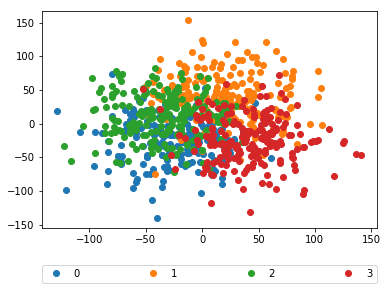

In [104]:
visualise(X_train, y_train)

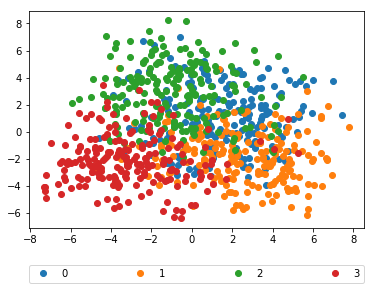

In [105]:
visualise(pipe.steps[0][1].transform(X_train), y_train)

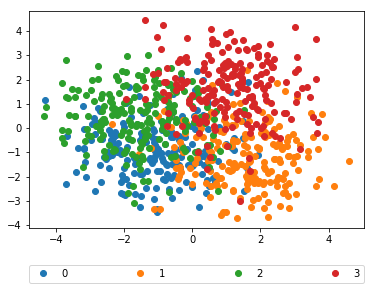

In [106]:
visualise(pipe2.steps[0][1].transform(X_train), y_train)

In [ ]:
visualise(encoding, y_train_small, "encoding")

In [ ]:
visualise(X_train_small, y_train_small, "CNN features")

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def visualise_lda(X, y):
    tr = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
    for i in np.unique(y):
        plt.plot(tr[y == i,0],tr[y == i,1], 'o', label=i)
        
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=5, mode="expand", borderaxespad=0.)
    plt.show()

/home/fede/miniconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


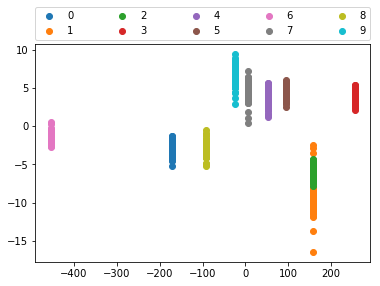

In [48]:
visualise_lda(X_train_small, y_train_small)

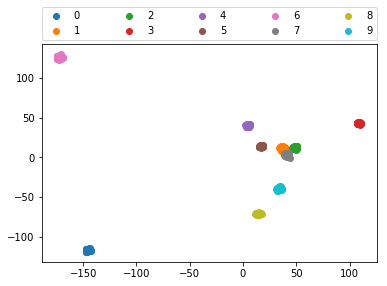

In [49]:
visualise_lda(encoding, y_train_small)